<a href="https://colab.research.google.com/github/Cgiresi/Execution-Cost-Optimization-Using-Polynomial-Ridge-Regression/blob/main/Algo_Trading_Code_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
from scipy import stats
import statsmodels.api as sm



In [14]:
from google.colab import drive
drive.mount('/content/drive')

# Then load the file from your Drive
file_path = '/content/drive/MyDrive/algoTrading/MIData-Algo-01.csv'
df = pd.read_csv(file_path)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd

# Example path — adjust     ---         this  ---    to match your actual file location
file_path = '/content/drive/MyDrive/algoTrading/MIData-Algo-01.csv'

# Load it
df = pd.read_csv(file_path)
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295946 entries, 0 to 295945
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Size        295946 non-null  float64
 1   Volatility  295946 non-null  float64
 2   POV         295946 non-null  float64
 3   Cost        295946 non-null  float64
dtypes: float64(4)
memory usage: 9.0 MB


,Size,Volatility,POV,Cost
0,0.076,0.344,0.227,55.9
1,0.746,0.324,0.277,140.1
2,0.390,0.101,0.532,67.0
3,0.025,0.315,0.219,26.3
4,0.227,0.292,0.237,83.3


from matplotlib import pyplot as plt
_df_0['Size'].plot(kind='hist', bins=20, title='Size')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Volatility'].plot(kind='hist', bins=20, title='Volatility')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['POV'].plot(kind='hist', bins=20, title='POV')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Cost'].plot(kind='hist', bins=20, title='Cost')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Size', y='Volatility', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Volatility', y='POV', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='POV', y='Cost', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Size'].plot(kind='line', figsize=(8, 4), title='Size')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Volatility'].plot(kind='line', figsize=(8, 4), title='Volatility')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['POV'].plot(kind='line', figsize=(8, 4), title='POV')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Cost'].plot(kind='line', figsize=(8, 4), title='Cost')
plt.gca().spines[['top', 'right']].set_visible(False)

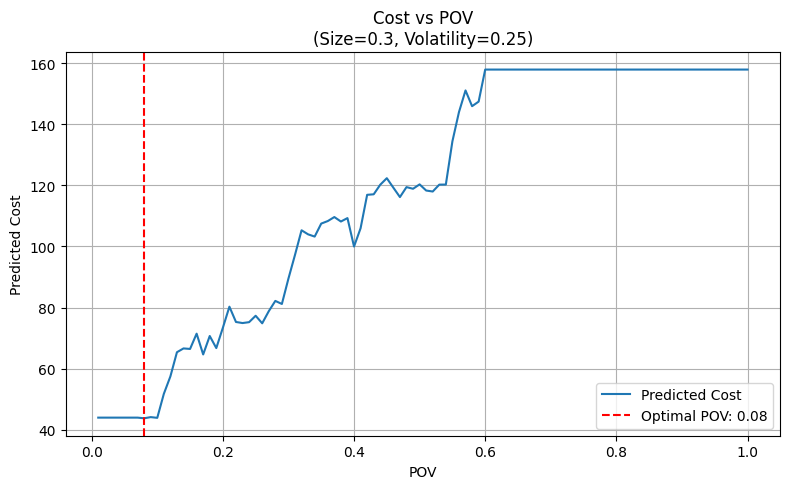

Optimal POV: 0.080, Expected Cost: 43.72


In [16]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load your data (adjust path accordingly)
file_path = '/content/drive/MyDrive/algoTrading/MIData-Algo-01.csv'  # <-- UPDATE THIS PATH
df = pd.read_csv(file_path)

# Optional: downsample to speed up modeling
df = df.sample(50000, random_state=42)

# Features and target
X = df[['Size', 'Volatility', 'POV']]
y = df['Cost']

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Simulation + Optimization Function
def optimize_pov(fixed_size, fixed_volatility, pov_range=np.linspace(0.01, 1.0, 100)):
    test_data = pd.DataFrame({
        'Size': [fixed_size] * len(pov_range),
        'Volatility': [fixed_volatility] * len(pov_range),
        'POV': pov_range
    })
    predicted_cost = model.predict(test_data)

    # Optimal POV (minimizes cost)
    min_index = np.argmin(predicted_cost)
    optimal_pov = pov_range[min_index]
    min_cost = predicted_cost[min_index]

    # Plot results
    plt.figure(figsize=(8, 5))
    plt.plot(pov_range, predicted_cost, label="Predicted Cost")
    plt.axvline(optimal_pov, color='r', linestyle='--', label=f'Optimal POV: {optimal_pov:.2f}')
    plt.title(f"Cost vs POV\n(Size={fixed_size}, Volatility={fixed_volatility})")
    plt.xlabel("POV")
    plt.ylabel("Predicted Cost")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return optimal_pov, min_cost

# Example simulation
opt_pov, opt_cost = optimize_pov(fixed_size=0.3, fixed_volatility=0.25)
print(f"Optimal POV: {opt_pov:.3f}, Expected Cost: {opt_cost:.2f}")


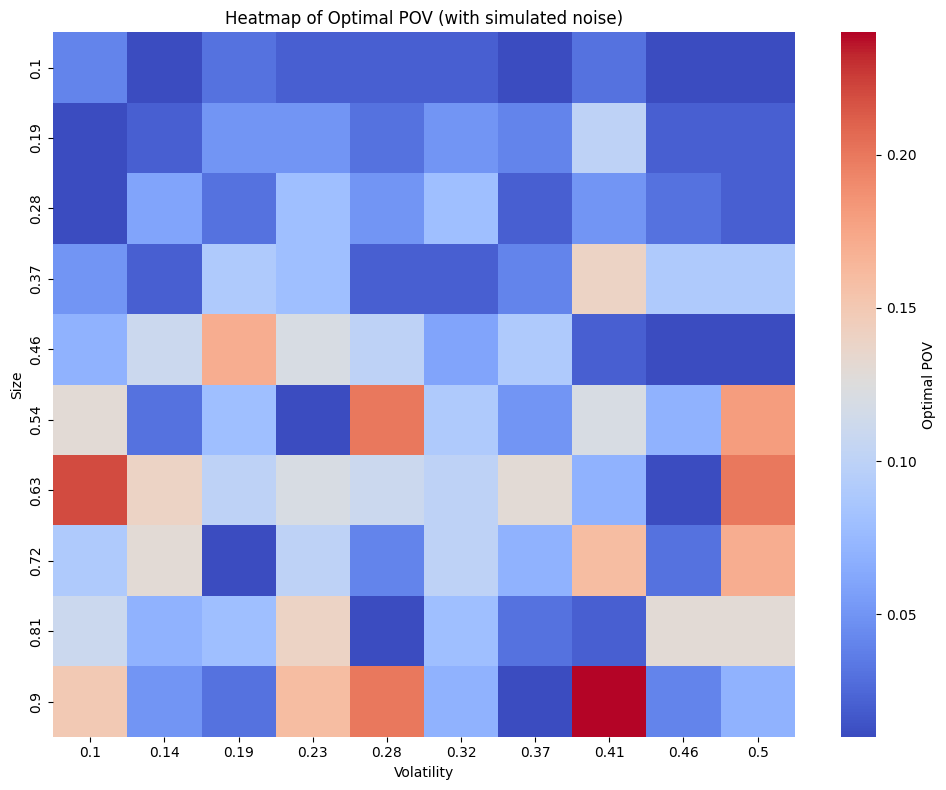

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

# === STEP 1: Load your dataset ===
# ✅ Update the path below to match the real location in your Google Drive
file_path = '/content/drive/MyDrive/algoTrading/MIData-Algo-01.csv'
df = pd.read_csv(file_path)

# Optional: downsample for performance
df = df.sample(50000, random_state=42)

# === STEP 2: Train Random Forest Model ===
X = df[['Size', 'Volatility', 'POV']]
y = df['Cost']
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# === STEP 3: Define Grid + Storage ===
size_vals = np.linspace(0.1, 0.9, 10)
vol_vals = np.linspace(0.1, 0.5, 10)
pov_range = np.linspace(0.01, 1.0, 100)

optimal_pov_matrix = np.zeros((len(size_vals), len(vol_vals)))

# === STEP 4: Simulation + Optimization ===
for i, s in enumerate(size_vals):
    for j, v in enumerate(vol_vals):
        test_data = pd.DataFrame({
            'Size': [s] * len(pov_range),
            'Volatility': [v] * len(pov_range),
            'POV': pov_range
        })
        predicted_cost = model.predict(test_data)

        # Add Gaussian noise (±5% simulated variance)
        noise = np.random.normal(0, 0.05 * predicted_cost)
        cost_with_noise = predicted_cost + noise

        # Find POV with minimum cost
        min_idx = np.argmin(cost_with_noise)
        optimal_pov_matrix[i, j] = pov_range[min_idx]

# === STEP 5: Plot Heatmap ===
plt.figure(figsize=(10, 8))
sns.heatmap(optimal_pov_matrix,
            xticklabels=np.round(vol_vals, 2),
            yticklabels=np.round(size_vals, 2),
            cmap='coolwarm',
            cbar_kws={'label': 'Optimal POV'})

plt.xlabel("Volatility")
plt.ylabel("Size")
plt.title("Heatmap of Optimal POV (with simulated noise)")
plt.tight_layout()
plt.show()


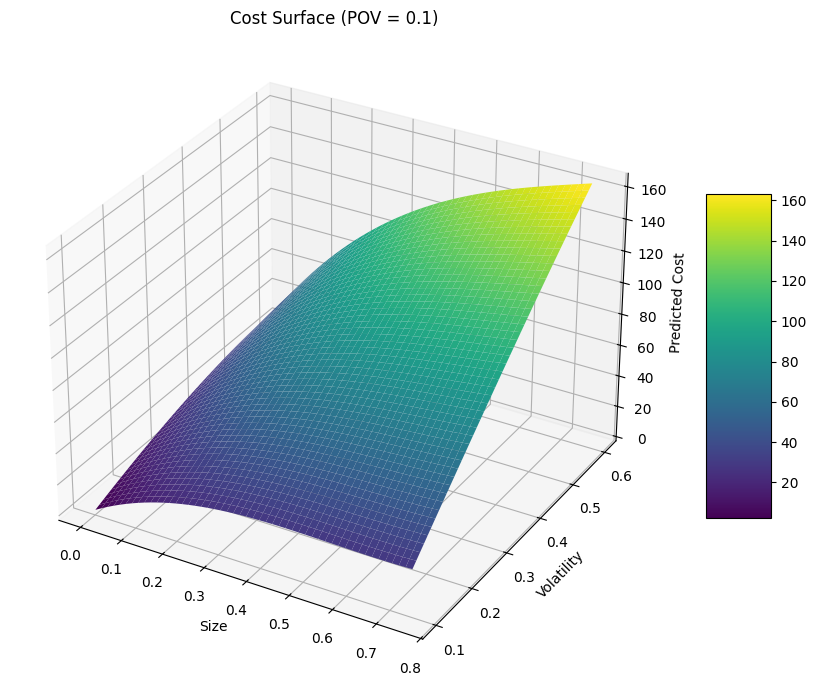

In [19]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (simulated for this environment)
file_path = '/content/drive/MyDrive/algoTrading/MIData-Algo-01.csv'
df = pd.read_csv(file_path)

# Sample for performance
df = df.sample(50000, random_state=42)

# Extract features and target
X = df[['Size', 'Volatility', 'POV']]
y = df['Cost']

# Split for modeling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Advanced Quant Technique: Polynomial Ridge Regression (Nonlinear Modeling with Regularization) ===
# Captures complex interactions and prevents overfitting with Ridge regularization
poly_model = make_pipeline(
    PolynomialFeatures(degree=3, include_bias=False),
    Ridge(alpha=1.0)
)
poly_model.fit(X_train, y_train)

# Create a 3D surface plot for Cost as a function of Size and Volatility at fixed POV
def plot_cost_surface(fixed_pov):
    size_vals = np.linspace(X['Size'].min(), X['Size'].max(), 50)
    vol_vals = np.linspace(X['Volatility'].min(), X['Volatility'].max(), 50)
    grid_size, grid_vol = np.meshgrid(size_vals, vol_vals)
    grid_data = pd.DataFrame({
        'Size': grid_size.ravel(),
        'Volatility': grid_vol.ravel(),
        'POV': [fixed_pov] * grid_size.size
    })
    predicted_cost = poly_model.predict(grid_data).reshape(grid_size.shape)

    # Plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(grid_size, grid_vol, predicted_cost, cmap='viridis')
    ax.set_xlabel('Size')
    ax.set_ylabel('Volatility')
    ax.set_zlabel('Predicted Cost')
    ax.set_title(f'Cost Surface (POV = {fixed_pov})')
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.tight_layout()
    plt.show()

plot_cost_surface(fixed_pov=0.1)
